In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)



In [2]:
raw_data = pd.read_csv('train.csv')
raw_data.shape
raw_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
raw_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Barton, Mr. David John",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Explore data

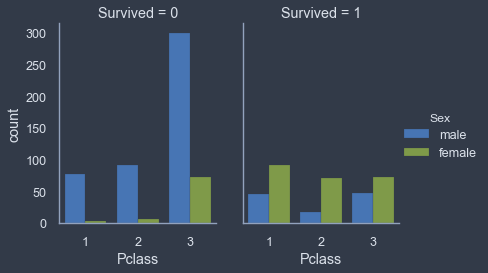

In [27]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=raw_data, kind="count",
                height=4, aspect=.7)

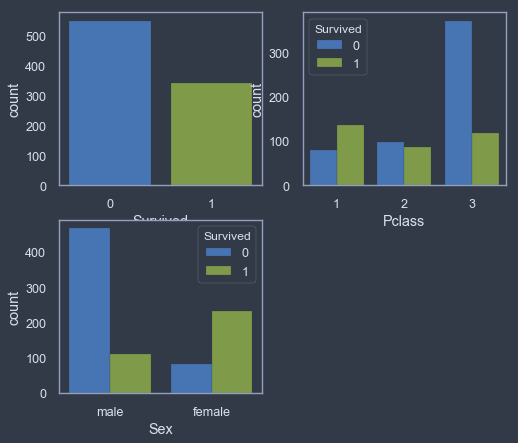

In [34]:
plt.figure()
plt.subplot(2, 2, 1)
sns.countplot(raw_data['Survived'])
plt.subplot(2, 2, 2)
sns.countplot(raw_data['Pclass'], hue=raw_data['Survived'])
plt.subplot(2, 2, 3)
sns.countplot(raw_data['Sex'], hue=raw_data['Survived'])

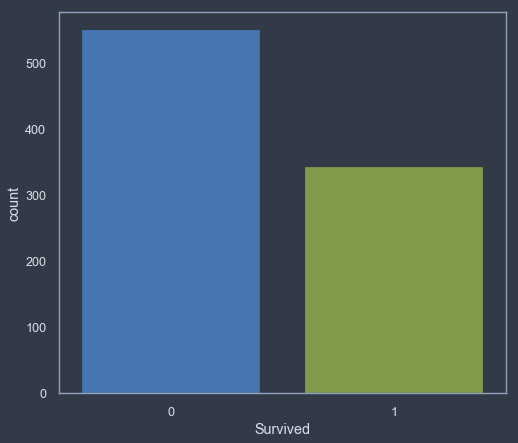

In [8]:
sns.countplot(raw_data['Survived'])

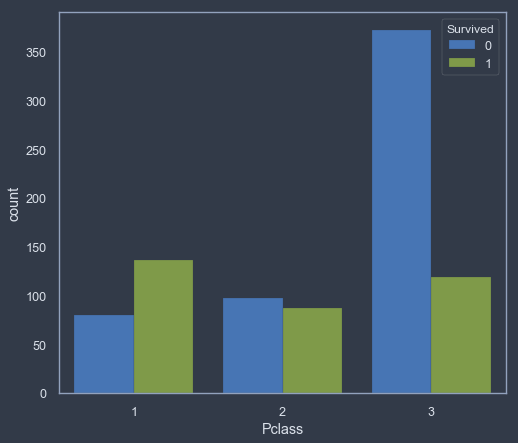

In [10]:
sns.countplot(raw_data['Pclass'], hue=raw_data['Survived'])

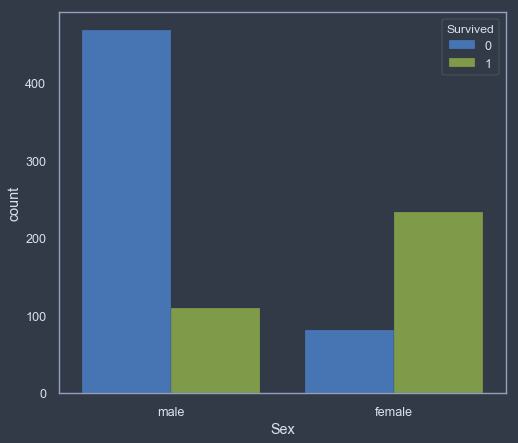

In [11]:
sns.countplot(raw_data['Sex'], hue=raw_data['Survived'])

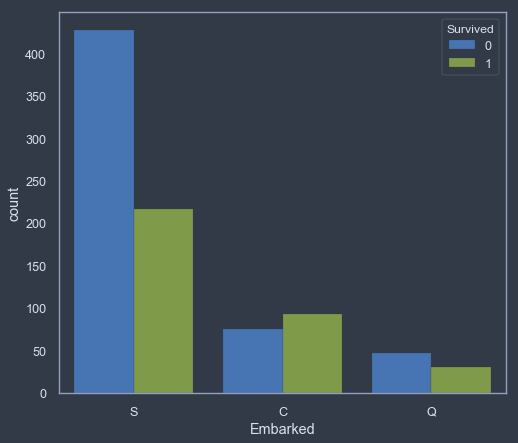

In [12]:
sns.countplot(raw_data['Embarked'], hue=raw_data['Survived'])

In [4]:
data = raw_data.copy()
data['Sex'].replace({'female':1, 'male':0},inplace=True)

In [86]:
from sklearn.ensemble import RandomForestRegressor
 
def set_missing_ages(df):
        
    df['Sex'].replace({'female':1, 'male':0},inplace=True)
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna('S')
    
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age', 'Fare', 'Sex', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    
    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1:])
    #  print predictedAges
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
        
    return df

In [93]:
new = set_missing_ages('test.csv')


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


In [95]:
new = new.drop(['Name','PassengerId','Ticket', 'Cabin'], axis=1)

In [96]:
data_dummies = pd.get_dummies(new)
data_dummies

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.500000,0,0,7.8292,0,1,0
1,3,1,47.000000,1,0,7.0000,0,0,1
2,2,0,62.000000,0,0,9.6875,0,1,0
3,3,0,27.000000,0,0,8.6625,0,0,1
4,3,1,22.000000,1,1,12.2875,0,0,1
5,3,0,14.000000,0,0,9.2250,0,0,1
6,3,1,30.000000,0,0,7.6292,0,1,0
7,2,0,26.000000,1,1,29.0000,0,0,1
8,3,1,18.000000,0,0,7.2292,1,0,0
9,3,0,21.000000,2,0,24.1500,0,0,1


In [9]:
targets = data_dummies['Survived']
targets

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [90]:
unscaled_inputs = data_dummies.iloc[:,1:]
unscaled_inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0
2,3,1,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,3,0,35.000000,0,0,8.0500,0,0,1
5,3,0,23.849820,0,0,8.4583,0,1,0
6,1,0,54.000000,0,0,51.8625,0,0,1
7,3,0,2.000000,3,1,21.0750,0,0,1
8,3,1,27.000000,0,2,11.1333,0,0,1
9,2,1,14.000000,1,0,30.0708,1,0,0


In [91]:
unscaled_inputs.shape

(891, 9)

# Standardize

In [12]:
# with dummy variables

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
# you dont need to understand, you only need to know how to use
class CustomScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns, copy=True, with_mean=True, with_std=True):
        self.scaler = StandardScaler(copy, with_mean, with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [13]:
unscaled_inputs.columns.values

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'], dtype=object)

In [14]:
column_to_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [15]:
titanic_scaler = CustomScaler(column_to_scale)

In [16]:
titanic_scaler.fit(unscaled_inputs)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CustomScaler(columns=['Age', 'SibSp', 'Parch', 'Fare'], copy=None,
             with_mean=None, with_std=None)

In [17]:
scaled_inputs = titanic_scaler.transform(unscaled_inputs)

In [18]:
scaled_inputs.shape

(891, 9)

In [19]:
scaled_inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,-0.556275,0.432793,-0.473674,-0.502445,0,0,1
1,1,1,0.612791,0.432793,-0.473674,0.786845,1,0,0
2,3,1,-0.264008,-0.474545,-0.473674,-0.488854,0,0,1
3,1,1,0.393591,0.432793,-0.473674,0.420730,0,0,1
4,3,0,0.393591,-0.474545,-0.473674,-0.486337,0,0,1
5,3,0,-0.421115,-0.474545,-0.473674,-0.478116,0,1,0
6,1,0,1.781857,-0.474545,-0.473674,0.395814,0,0,1
7,3,0,-2.017607,2.247470,0.767630,-0.224083,0,0,1
8,3,1,-0.190942,-0.474545,2.008933,-0.424256,0,0,1
9,2,1,-1.140808,0.432793,-0.473674,-0.042956,1,0,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_test_split(scaled_inputs, targets, train_size=0.8)

[     Pclass  Sex       Age     SibSp     Parch      Fare  Embarked_C  \
 515       1    0  1.270390 -0.474545 -0.473674  0.036577           0   
 452       1    0  0.028258 -0.474545 -0.473674 -0.089684           1   
 854       2    1  1.051191  0.432793 -0.473674 -0.124920           0   
 46        3    0  0.292225  0.432793 -0.473674 -0.336334           0   
 689       1    1 -1.067741 -0.474545  0.767630  3.606793           0   
 302       3    0 -0.775474 -0.474545 -0.473674 -0.648422           0   
 202       3    0  0.320525 -0.474545 -0.473674 -0.517631           0   
 264       3    1 -0.254328 -0.474545 -0.473674 -0.492378           0   
 381       3    1 -2.090673 -0.474545  2.008933 -0.331467           1   
 244       3    0  0.028258 -0.474545 -0.473674 -0.502949           1   
 729       3    1 -0.337075  0.432793 -0.473674 -0.488854           0   
 251       3    1 -0.044808  0.432793  0.767630 -0.437762           0   
 324       3    0 -1.468729  6.784163  2.008933  0.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, 
                                                    train_size=0.8, random_state=330)

In [23]:
print(x_train.shape, y_train.shape)

(712, 9) (712,)


In [24]:
print(x_test.shape, y_test.shape)

(179, 9) (179,)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [26]:
reg = LogisticRegression()

In [27]:
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
reg.score(x_train, y_train)

0.8132022471910112

In [29]:
model_ouputs = reg.predict(x_train)
model_ouputs

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,

In [30]:
np.sum(model_ouputs == y_train)/ y_train.shape[0]

0.8132022471910112

In [31]:
reg.coef_[0]

array([-1.17810011,  2.69283682, -0.4609319 , -0.35459392, -0.07487797,
        0.06369615,  0.09578358,  0.07141229, -0.33985438])

In [32]:
reg.intercept_[0]

1.3341927845995487

In [33]:
feature_name = unscaled_inputs.columns.values
feature_name

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'], dtype=object)

In [34]:
summary_table = pd.DataFrame(columns=['feature_name'], data=feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table.index = summary_table.index+1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

summary_table

,feature_name,Coefficient
0,Intercept,1.334193
1,Pclass,-1.178100
2,Sex,2.692837
3,Age,-0.460932
4,SibSp,-0.354594
5,Parch,-0.074878
6,Fare,0.063696
7,Embarked_C,0.095784
8,Embarked_Q,0.071412
9,Embarked_S,-0.339854


In [35]:
# more high odds ratio is more important
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_ratio', ascending=False)

,feature_name,Coefficient,Odds_ratio
2,Sex,2.692837,14.773526
0,Intercept,1.334193,3.796930
7,Embarked_C,0.095784,1.100521
8,Embarked_Q,0.071412,1.074024
6,Fare,0.063696,1.065769
5,Parch,-0.074878,0.927857
9,Embarked_S,-0.339854,0.711874
4,SibSp,-0.354594,0.701458
3,Age,-0.460932,0.630696
1,Pclass,-1.178100,0.307863


In [36]:
reg.score(x_test, y_test)

0.770949720670391

# Save the model

In [37]:
import pickle

In [38]:
# dump means save
#with open('filename','write bytes') as file:
#    pickle.dump('object to be dumped',file)

with open('model', 'wb') as file:
    pickle.dump(reg, file)

In [39]:
with open('scaler', 'wb') as file:
    pickle.dump(titanic_scaler, file)